In [8]:
import os

data_dir = "cell_images"
print(os.listdir(data_dir))

['test', 'train']


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [30]:
test_path = os.path.join(data_dir, 'test')
train_path = os.path.join(data_dir, 'train')
print(os.listdir(test_path))
print(os.listdir(train_path))


['parasitized', 'uninfected']
['parasitized', 'uninfected']


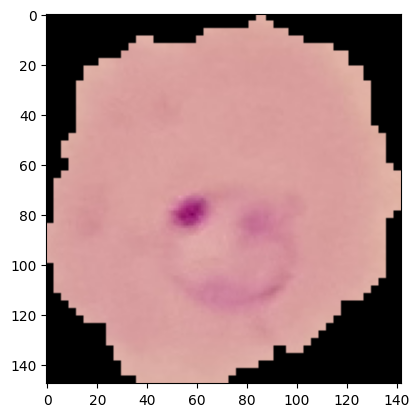

(148, 142, 3)


In [25]:
os.listdir(train_path+'parasitized')[0]
parasitized_image_path = os.path.join(train_path, 'parasitized', os.listdir(os.path.join(train_path, 'parasitized'))[0])
first_image = imread(parasitized_image_path) # transform to numpy array
plt.imshow(first_image)
plt.show()
print(first_image.shape)

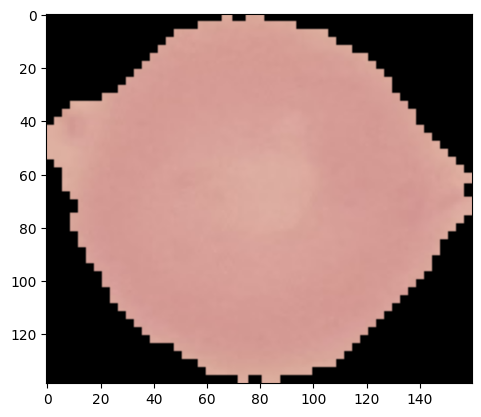

(139, 160, 3)


In [28]:
os.listdir(train_path+'uninfected')[0]
uninfected_image_path = os.path.join(train_path, 'uninfected', os.listdir(os.path.join(train_path, 'uninfected'))[0])
first_image = imread(uninfected_image_path) # transform to numpy array
plt.imshow(first_image)
plt.show()
print(first_image.shape)

In [35]:
train_parasitized_image_count = len(os.listdir(os.path.join(train_path, "parasitized")))
train_uninfected_image_count = len(os.listdir(os.path.join(train_path, "uninfected")))
print(f"train parasitized count: {train_parasitized_image_count}")
print(f"train uninfected count: {train_uninfected_image_count}")

train parasitized count: 12480
train uninfected count: 12480


In [37]:
test_parasitized_image_count = len(os.listdir(os.path.join(test_path, "parasitized")))
test_uninfected_image_count = len(os.listdir(os.path.join(test_path, "uninfected")))
print(f"test parasitized count: {test_parasitized_image_count}")
print(f"test uninfected count: {test_uninfected_image_count}")

test parasitized count: 1300
test uninfected count: 1300


In [44]:
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_path, "uninfected")):
    img = imread(os.path.join(test_path, "uninfected", image_filename))
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
print(dim1[:5])
print(dim2[:5]) 
# touts les images ont des tailles différentes ce qui est plus réelle

[118, 172, 130, 163, 172]
[118, 145, 151, 145, 139]


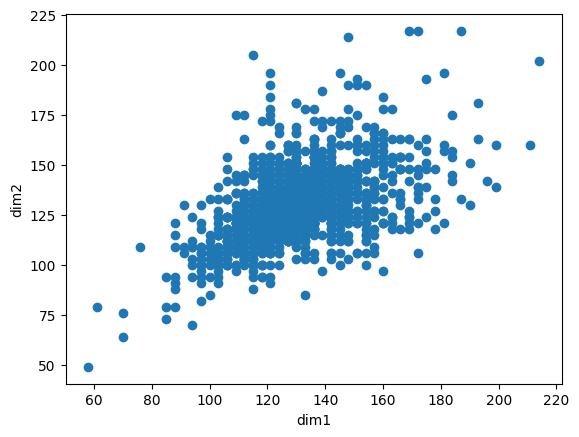

In [52]:
plt.scatter(dim1, dim2)
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.show() # permet de voir les différentes tailles des images (ici par exemple la plus petite fait 5Xx5X et la plus grande 2XXx2XX)

In [54]:
# le réseau de convolution prend en entrée des images de même taille, il faut donc les mettre à la même taille
print(np.mean(dim1))
print(np.mean(dim2))

130.92538461538462
130.75


In [55]:
image_shape = (130, 130, 3) # on prend la moyenne des dimensions pour avoir une taille commune

In [57]:
130 * 130 * 3 # ce sont les paramètres d'entrée du réseau de convolution

50700

## Utilisation de l'Augmentation d'Images pour Améliorer la Diversité des Données

Lors de l'entraînement d'un réseau neuronal convolutionnel, il est souvent bénéfique d'augmenter la diversité des données pour améliorer la généralisation du modèle. Cela peut être réalisé en utilisant des techniques d'augmentation d'images, telles que celles fournies par la classe `ImageDataGenerator` de TensorFlow.

**Paramètres d'Augmentation d'Images**

L'utilisation de `ImageDataGenerator` avec divers paramètres permet de créer des versions transformées des images d'origine. Voici quelques-uns des paramètres couramment utilisés :

- **rotation_range:** Rotation aléatoire des images dans une plage définie (en degrés).
- **width_shift_range et height_shift_range:** Décalage horizontal et vertical aléatoire des images.
- **rescale:** Facteur de rééchelonnement des pixels (normalisation).
- **shear_range:** Inclinaison aléatoire des images.
- **zoom_range:** Zoom aléatoire des images.
- **horizontal_flip:** Retournement horizontal aléatoire des images.
- **fill_mode:** Mode de remplissage utilisé pour combler les pixels après une transformation.

**Avantages de l'Augmentation d'Images**

1. **Diversité des Données:** L'augmentation d'images crée des variations des images d'entraînement, augmentant ainsi la diversité des données.
2. **Réduction du Surapprentissage:** En exposant le modèle à une plus grande variété d'images, on réduit le risque de surapprentissage.

**Batch Size**

L'utilisation d'un batch size lors de l'entraînement est cruciale, surtout avec un grand nombre de paramètres. Le batch size détermine le nombre d'échantillons d'entraînement utilisés dans une itération. Il permet une mise à jour plus fréquente des poids du modèle, contribuant à une convergence plus rapide.

**Conclusion**

En résumé, l'augmentation d'images est une technique importante pour améliorer la diversité des données et prévenir le surapprentissage. L'utilisation d'un batch size approprié est également essentielle pour un entraînement efficace du modèle.


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')   

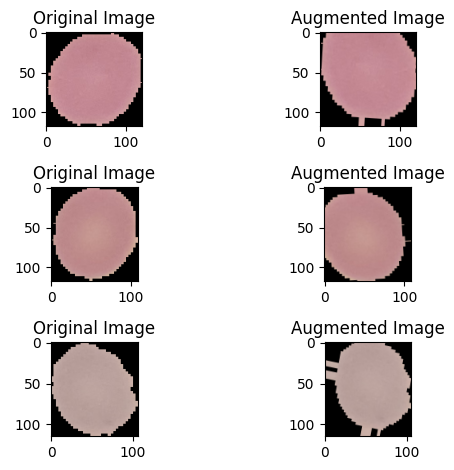

In [68]:
import random

# Get 3 random images from the dataset
random_image_paths = random.sample(os.listdir(os.path.join(train_path, "uninfected")), 3)

# Display the original and augmented images for each random image
for i, image_path in enumerate(random_image_paths):
    # Load the original image
    random_image = imread(os.path.join(train_path, "uninfected", image_path))

    # Display the original image
    plt.subplot(3, 2, i*2+1)
    plt.imshow(random_image)
    plt.title("Original Image")

    # Apply image augmentation
    augmented_image = image_gen.random_transform(random_image)

    # Display the augmented image
    plt.subplot(3, 2, i*2+2)
    plt.imshow(augmented_image)
    plt.title("Augmented Image")

plt.tight_layout()
plt.show()

In [70]:
# Pour utiliser la méthode .flow_from_directory, vous devez organiser les images dans des sous-répertoires. C'est une exigence absolue, sinon la méthode ne fonctionnera pas. Les répertoires ne doivent contenir que des images d'une seule classe, donc un dossier par classe d'images.
print(image_gen.flow_from_directory(train_path))
print(image_gen.flow_from_directory(test_path))


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))  # Add Dropout layer with dropout rate of 0.5
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the batch size
batch_size = 32

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary', shuffle=False)

# Train the model
history = model.fit(train_image_gen, epochs=10, validation_data=test_image_gen, callbacks=[early_stop])

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.
Epoch 1/10
780/780 [==============================] - 345s 442ms/step - loss: 0.3639 - accuracy: 0.8491 - val_loss: 0.2106 - val_accuracy: 0.9300
Epoch 2/10
780/780 [==============================] - 236s 303ms/step - loss: 0.1943 - accuracy: 0.9395 - val_loss: 0.1685 - val_accuracy: 0.9458
Epoch 3/10
780/780 [==============================] - 227s 291ms/step - loss: 0.1704 - accuracy: 0.9466 - val_loss: 0.1606 - val_accuracy: 0.9462
Epoch 4/10
780/780 [==============================] - 252s 323ms/step - loss: 0.1609 - accuracy: 0.9501 - val_loss: 0.1571 - val_accuracy: 0.9500
Epoch 5/10
780/780 [==============================] - 262s 335ms/step - loss: 0.1571 - accuracy: 0.9500 - val_loss: 0.1510 - val_accuracy: 0.9481
Epoch 6/10
780/780 [==============================] - 211s 270ms/step - loss: 0.1552 - accuracy: 0.9494 - val_loss: 0.1566 - val_accuracy: 0.9477
Epoch 7/10
780/780 [===================

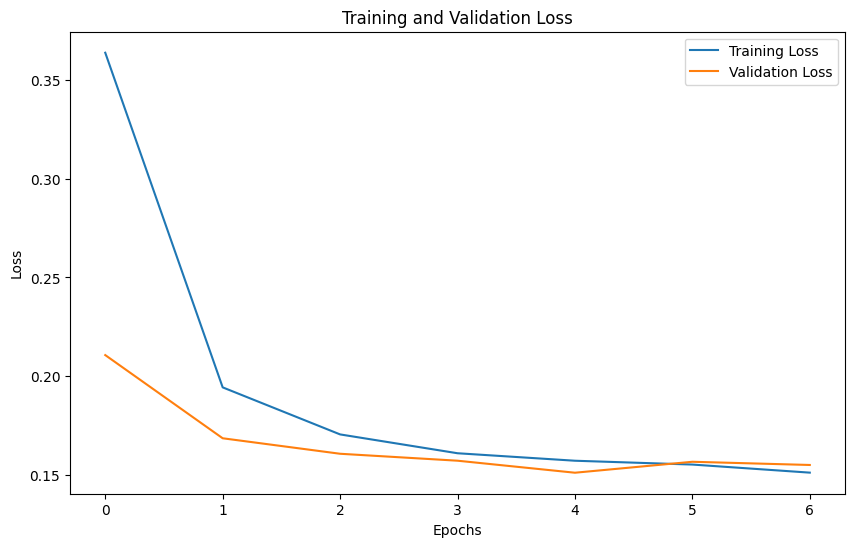

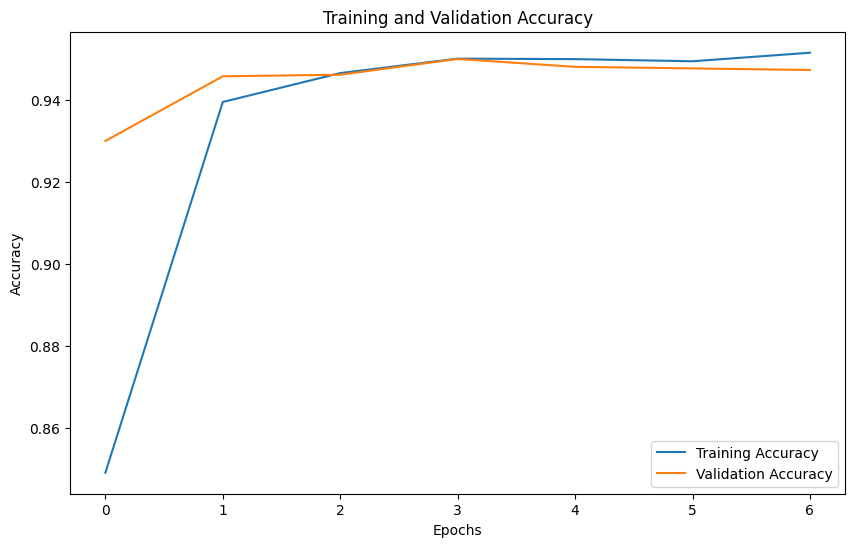

In [75]:
# Evaluate the model
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_acc)), train_acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [80]:
# Make predictions on the test dataset
predictions = model.predict(test_image_gen)

82/82 [==============================] - 11s 131ms/step


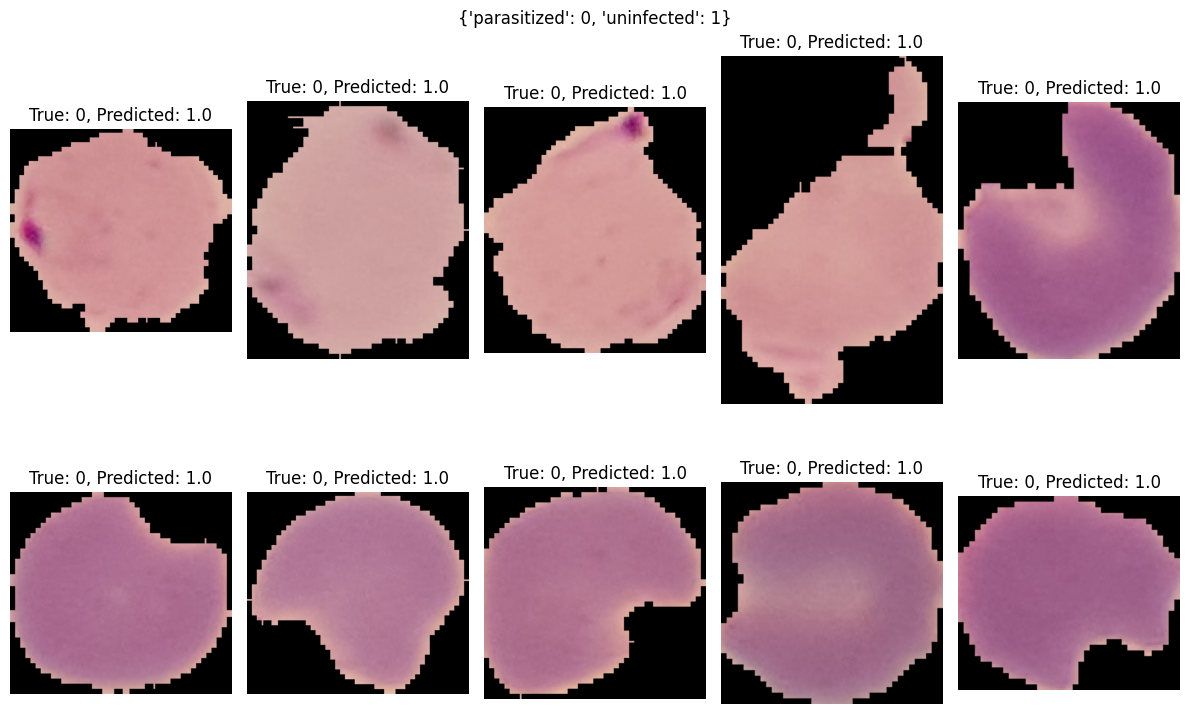

In [116]:
# Get the predicted labels
predicted_labels = np.round(predictions).flatten()

# Get the true labels
true_labels = test_image_gen.classes

# Find the misclassified images
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Display the misclassified images
plt.figure(figsize=(12, 8))
for i, index in enumerate(misclassified_indices[:10]):
    image = imread(os.path.join(test_path, test_image_gen.filenames[index]))
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(f"True: {true_labels[index]}, Predicted: {predicted_labels[index]}")
    plt.axis('off')

plt.tight_layout()
plt.figtext(0.5, 0.98, train_image_gen.class_indices, ha="center", fontsize=12)
plt.show()

In [137]:
import random
import os
from tensorflow.keras.preprocessing import image


(-0.5, 129.5, 129.5, -0.5)

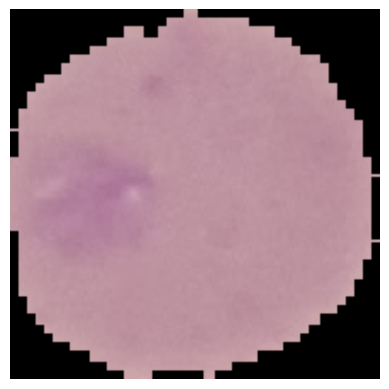

In [172]:
random_subdir = random.choice(os.listdir(test_path))
random_file = random.choice(os.listdir(os.path.join(test_path, random_subdir)))
random_file_path = os.path.join(test_path, random_subdir, random_file)

random_image = image.load_img(random_file_path, target_size=image_shape)
plt.imshow(random_image)
plt.axis('off')

In [173]:
my_img = image.img_to_array(random_image) # transform to numpy array
print(my_img.shape)
my_img = np.expand_dims(my_img, axis=0) # add a dimension to transform from (130, 130, 3) to (1, 130, 130, 3)
print(my_img.shape)

(130, 130, 3)
(1, 130, 130, 3)


1/1 [==============================] - 0s 36ms/step
Prediction: 1.0
Predicted class: uninfected


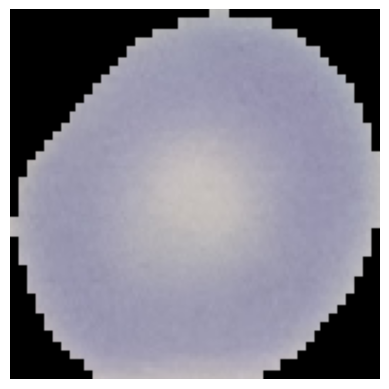

In [335]:
random_subdir = random.choice(os.listdir(test_path))
random_file = random.choice(os.listdir(os.path.join(test_path, random_subdir)))
random_file_path = os.path.join(test_path, random_subdir, random_file)

random_image = image.load_img(random_file_path, target_size=image_shape)
plt.imshow(random_image)
plt.axis('off')
my_img = image.img_to_array(random_image) # transform to numpy array
my_img = np.expand_dims(my_img, axis=0) # add a dimension to transform from (130, 130, 3) to (1, 130, 130, 3)

prediction = model.predict(my_img)
predicted_class = 'parasitized' if prediction < 0.5 else 'uninfected'

# Convert prediction to percentage
if predicted_class == 'parasitized':
    prediction_percentage = (1 - prediction.item())
else:
    prediction_percentage = prediction.item()

print(f"Prediction: {prediction_percentage}")
print(f"Predicted class: {predicted_class}")